# Assignment 3

# 1. DATA: 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from __future__  import print_function
from scipy import stats
import os
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#download data
os.system("curl -O https://raw.githubusercontent.com/lingyielia/PUI2017_lz1714/master/HW5_lz1714/data/World_firearms_murders_and_ownership1.csv")
os.system("mv " + "World_firearms_murders_and_ownership1.csv " + os.getenv("PUIDATA"))
os.system("curl -O https://raw.githubusercontent.com/lingyielia/PUI2017_lz1714/master/HW5_lz1714/data/API_SP.POP.TOTL_DS2_en_csv_v2.csv")
os.system("mv " + "API_SP.POP.TOTL_DS2_en_csv_v2.csv " + os.getenv("PUIDATA"))
os.system("curl -O https://raw.githubusercontent.com/lingyielia/PUI2017_lz1714/master/HW5_lz1714/data/data-pvLFI.csv")
os.system("mv " + "data-pvLFI.csv " + os.getenv("PUIDATA"))
os.system("curl -O https://raw.githubusercontent.com/lingyielia/PUI2017_lz1714/master/HW5_lz1714/data/API_NY.GDP.MKTP.CD_DS2_en_csv_v2.csv")
os.system("mv " + "API_NY.GDP.MKTP.CD_DS2_en_csv_v2.csv " + os.getenv("PUIDATA"))

0

In [3]:
#read data
df1 = pd.read_csv(os.getenv("PUIDATA") + "/" + "World_firearms_murders_and_ownership1.csv")
df2 = pd.read_csv(os.getenv("PUIDATA") + "/" + "API_SP.POP.TOTL_DS2_en_csv_v2.csv", sep='\t')
df2.rename(columns = {'2012' : 'pop'}, inplace=True)
df3 = pd.read_csv(os.getenv("PUIDATA") + "/" + "data-pvLFI.csv")
df4 = pd.read_csv(os.getenv("PUIDATA") + "/" + "API_NY.GDP.MKTP.CD_DS2_en_csv_v2.csv", sep='\t')
df4.rename(columns = {'2012' : 'gdp'}, inplace=True)

In [4]:
#merge datasets
result = df1.merge(df2, left_on='Country/Territory', right_on='Country Name', how='inner')
result = result.merge(df3, left_on='Country Name', right_on='Country', how='inner')
result = result.merge(df4, left_on='Country Name', right_on='Country Name', how='inner')
result.head()

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms,Country Name,...,2007_y,2008_y,2009_y,2010_y,2011_y,gdp,2013_y,2014_y,2015_y,2016_y
0,Australia,AU,NSO,11.5,30.0,0.14,42.0,15.0,3050000.0,Australia,...,8.537650e+11,1.055330e+12,9.271680e+11,1.142880e+12,1.390560e+12,1.538190e+12,1.567180e+12,1.459600e+12,1.345380e+12,1.204620e+12
1,Austria,AT,CTS,29.5,18.0,0.22,14.0,30.4,2500000.0,Austria,...,3.864590e+11,4.276120e+11,3.975940e+11,3.902120e+11,4.290370e+11,4.074520e+11,4.282480e+11,4.383760e+11,3.769670e+11,3.864280e+11
2,Canada,CA,CTS,32.0,173.0,0.51,13.0,30.8,9950000.0,Canada,...,1.464980e+12,1.549130e+12,1.371150e+12,1.613460e+12,1.788650e+12,1.824290e+12,1.842630e+12,1.792880e+12,1.552810e+12,1.529760e+12
3,Denmark,DK,CTS,31.9,15.0,0.27,54.0,12.0,650000.0,Denmark,...,3.194230e+11,3.533610e+11,3.212410e+11,3.219950e+11,3.440030e+11,3.271490e+11,3.435840e+11,3.522970e+11,3.013080e+11,3.061430e+11
4,Finland,FI,CTS,19.8,24.0,0.45,4.0,45.3,2400000.0,Finland,...,2.553850e+11,2.837420e+11,2.514990e+11,2.478000e+11,2.736740e+11,2.567060e+11,2.699800e+11,2.726090e+11,2.323620e+11,2.367850e+11


In [5]:
print(result.columns)

Index(['Country/Territory', 'ISO code', 'Source', '% of homicides by firearm',
       'Number of homicides by firearm',
       'Homicide by firearm rate per 100,000 pop', 'Rank by rate of ownership',
       'Average firearms per 100 people',
       'Average total all civilian firearms', 'Country Name',
       ...
       '2007_y', '2008_y', '2009_y', '2010_y', '2011_y', 'gdp', '2013_y',
       '2014_y', '2015_y', '2016_y'],
      dtype='object', length=133)


In [6]:
df = result[['Country Name', 'Average total all civilian firearms', 'pop', 'gdp', 'Number of homicides by firearm', 'Country', 'Guns/100 inhabitants', 'Number of mass shootings']]
df = df.copy(deep=True) #make a copy
df.head()

,Country Name,Average total all civilian firearms,pop,gdp,Number of homicides by firearm,Country,Guns/100 inhabitants,Number of mass shootings
0,Australia,3050000.0,22728254.0,1.538190e+12,30.0,Australia,15.0,4
1,Austria,2500000.0,8429991.0,4.074520e+11,18.0,Austria,30.4,1
2,Canada,9950000.0,34750545.0,1.824290e+12,173.0,Canada,30.8,4
3,Denmark,650000.0,5591572.0,3.271490e+11,15.0,Denmark,12.0,0
4,Finland,2400000.0,5413971.0,2.567060e+11,24.0,Finland,45.3,2


# 2. exploration

#### plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

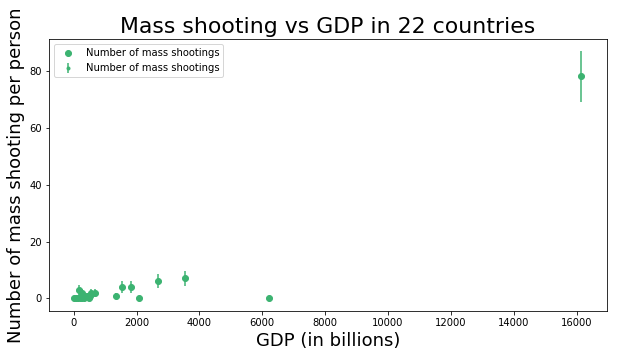

Figure 1. Number of mass shooting vs GDP. Errors represent Poisson statistics. The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [7]:
fig = plt.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
scatter = ax.scatter(df.gdp / 1e9, df['Number of mass shootings'], color='mediumseagreen')
ax.errorbar(df.gdp / 1e9, df['Number of mass shootings'], 
            yerr = np.sqrt(df['Number of mass shootings'] * 1.0), 
            fmt = '.', color='mediumseagreen')
ax.set_xlabel("GDP (in billions)", fontsize = 18)
ax.set_ylabel("Number of mass shooting per person", fontsize = 18)
ax.set_ylim()
ax.set_title("Mass shooting vs GDP in 22 countries", fontsize=22)
ax.legend()
plt.show()
print ("\033[1mFigure 1. Number of mass shooting vs GDP.\033[0m " + 
       "Errors represent Poisson statistics. " + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")

In [8]:
df['gdp_pp'] = df['gdp'] / df['pop'] #gdp per person

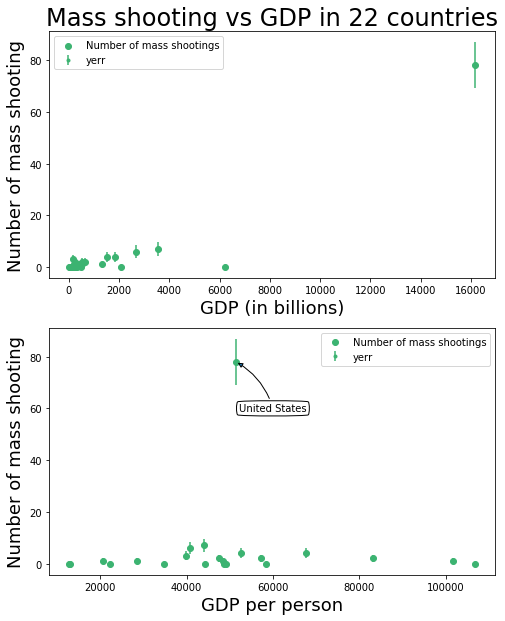

Figure 2. Number of mass shooting vs GDP.  Errors represent Poisson statistics. The datapoint to the top right of the plot is the USA, which has the highest GDP and the highest number of mass shootings. USA does not have the highest GDP per person, but has highest mass shootings.


In [9]:
fig = plt.figure(figsize=(8,10)) 
ax1 = fig.add_subplot(211)

scatter = ax1.scatter(df['gdp']/ 1e9, df['Number of mass shootings'], color='mediumseagreen')
ax1.set_xlabel('GDP (in billions)', fontsize = 18)
ax1.set_ylabel('Number of mass shooting', fontsize = 18)
ax1.errorbar(df.gdp / 1e9, df['Number of mass shootings'], 
             yerr = np.sqrt(df['Number of mass shootings'] * 1.0),
             fmt = '.', color='mediumseagreen', label='yerr')
ax1.set_ylim()
ax1.legend()
plt.title("Mass shooting vs GDP in 22 countries", fontsize=24)

ax2 = fig.add_subplot(212)
scatter = ax2.scatter(df['gdp_pp'], df['Number of mass shootings'], color='mediumseagreen')
ax2.errorbar(df['gdp_pp'], df['Number of mass shootings'], 
             yerr = np.sqrt(df["Number of mass shootings"]*1.0), 
             fmt = '.', color='mediumseagreen', label='yerr')
ax2.set_xlabel('GDP per person', fontsize = 18)
ax2.set_ylabel('Number of mass shooting', fontsize = 18)
ax2.set_ylim()
ax2.legend()
ax2.annotate('United States', 
             xy=(df['gdp_pp'][df['Country Name']=='United States'], 
                 df['Number of mass shootings'][df['Country Name']=='United States']), 
             xycoords='data', xytext=(60000,60), textcoords='data', size=10, va="center",
             ha="center",bbox=dict(boxstyle="round4", fc="w"), arrowprops=dict(arrowstyle="-|>",
                                  connectionstyle="arc3,rad=0.2"))

plt.show()
print ("\033[1mFigure 2. Number of mass shooting vs GDP.\033[0m  " + 
       "Errors represent Poisson statistics. " + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has the highest GDP and the highest number of mass shootings. " +
       "USA does not have the highest GDP per person, but has highest mass shootings.")

#### plot the average number of civilian fire arms per person

In [10]:
df['CivilianFireArms_pp'] = df["Average total all civilian firearms"] / df['pop'] * 1e3

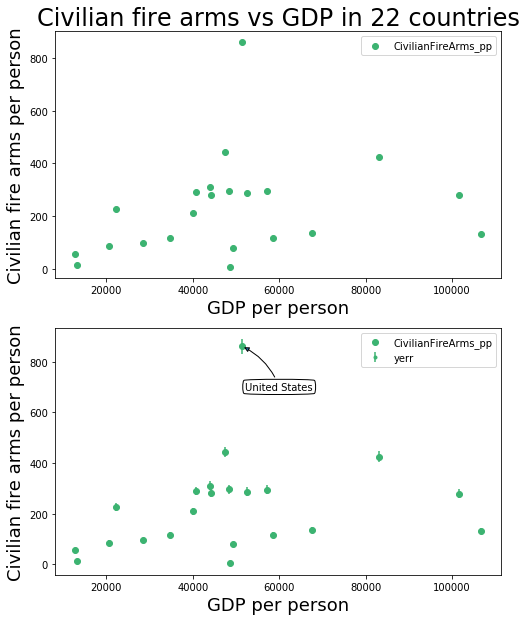

Figure 3. Average number of civilian fire arms per person. The datapoint on the top of the plot is the USA, which does not have the highest GDP per person, but has highest number of civilian fire arms per person.


In [11]:
fig = plt.figure(figsize=(8,10)) 

ax1 = fig.add_subplot(211)
scatter = ax1.scatter(df['gdp_pp'], df['CivilianFireArms_pp'], color='mediumseagreen')
ax1.set_xlabel('GDP per person', fontsize = 18)
ax1.set_ylabel('Civilian fire arms per person', fontsize = 18)
ax1.set_ylim()
ax1.legend()
plt.title("Civilian fire arms vs GDP in 22 countries", fontsize=24)

ax2 = fig.add_subplot(212)
scatter = ax2.scatter(df['gdp_pp'], df['CivilianFireArms_pp'], color='mediumseagreen')
ax2.errorbar(df['gdp_pp'], df['CivilianFireArms_pp'], 
             yerr = np.sqrt(df['CivilianFireArms_pp']*1.0), fmt = '.', 
             color='mediumseagreen', label='yerr')
ax2.set_xlabel('GDP per person', fontsize = 18)
ax2.set_ylabel('Civilian fire arms per person', fontsize = 18)
ax2.set_ylim()
ax2.legend()
ax2.annotate('United States', 
             xy=(df['gdp_pp'][df['Country Name']=='United States'], 
                 df['CivilianFireArms_pp'][df['Country Name']=='United States']), 
             xycoords='data', xytext=(60000,700), textcoords='data', size=10, va="center", 
             ha="center",bbox=dict(boxstyle="round4", fc="w"), arrowprops=dict(arrowstyle="-|>",
                                  connectionstyle="arc3,rad=0.2"))
plt.show()
print ("\033[1mFigure 3. Average number of civilian fire arms per person.\033[0m " + 
       "The datapoint on the top of the plot is the USA, " + 
       "which does not have the highest GDP per person, " +
       "but has highest number of civilian fire arms per person.")

#### plot the average number of homicide by fire arms per person

In [12]:
df['NumberOfHomicide_pp'] = df['Number of homicides by firearm'] / df['pop'] * 1e6

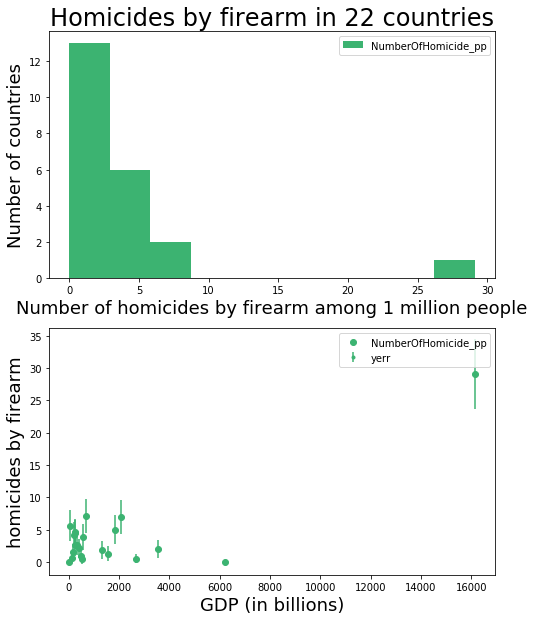

Figure 4. Number of homicides by firearm among 1 million people. The datapoint on the top right of the plot is the USA, which has the highest GDP, and highest number of homicides by firearm among 1 million people.


In [13]:
fig = plt.figure(figsize=(8,10)) 

ax1 = fig.add_subplot(211)
ax1.hist(df['NumberOfHomicide_pp'], color='mediumseagreen')
ax1.set_xlabel('Number of homicides by firearm among 1 million people', fontsize = 18)
ax1.set_ylabel('Number of countries', fontsize = 18)
ax1.set_ylim()
ax1.legend()
plt.title("Homicides by firearm in 22 countries", fontsize=24)

ax2 = fig.add_subplot(212)
scatter = ax2.scatter(df['gdp'] / 1e9, df['NumberOfHomicide_pp'], color='mediumseagreen')
ax2.errorbar(df['gdp'] / 1e9, df['NumberOfHomicide_pp'], 
             yerr = np.sqrt(df['NumberOfHomicide_pp']*1.0), 
             fmt = '.', color='mediumseagreen', label='yerr')
ax2.set_xlabel('GDP (in billions)', fontsize = 18)
ax2.set_ylabel('homicides by firearm', fontsize = 18)
ax2.set_ylim()
ax2.legend()

plt.show()
print ("\033[1mFigure 4. Number of homicides by firearm among 1 million people.\033[0m " + 
       "The datapoint on the top right of the plot is the USA, " + 
       "which has the highest GDP, " +
       "and highest number of homicides by firearm among 1 million people.")

#### plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color

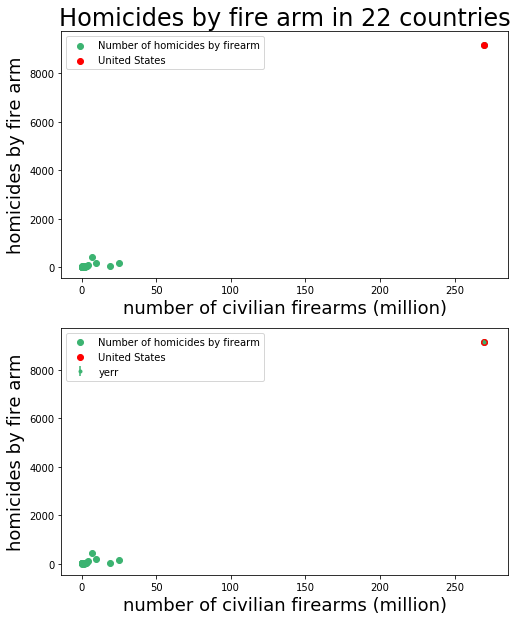

Figure 5. Number of homicides by firearm vs number of civilian firearms (million). The datapoint on the top right (marked red) of the plot is the USA, which has the highest number of civilian firearms, and has highest number of homicides by fire arm.


In [14]:
fig = plt.figure(figsize=(8,10)) 

ax1 = fig.add_subplot(211)
scatter = ax1.scatter(df['Average total all civilian firearms']/1e6, 
                      df['Number of homicides by firearm'], color='mediumseagreen')
ax1.set_xlabel('number of civilian firearms (million)', fontsize = 18)
ax1.set_ylabel('homicides by fire arm', fontsize = 18)
plt.scatter(df['Average total all civilian firearms'][df['Country Name']=='United States']/1e6, 
            df['Number of homicides by firearm'][df['Country Name']=='United States'], 
            label='United States', c='r')
ax1.set_ylim()
ax1.legend()
plt.title("Homicides by fire arm in 22 countries", fontsize=24)

ax2 = fig.add_subplot(212)
scatter = ax2.scatter(df['Average total all civilian firearms']/1e6, 
                      df['Number of homicides by firearm'], color='mediumseagreen')
ax2.errorbar(df['Average total all civilian firearms']/1e6, df['Number of homicides by firearm'], 
             yerr = np.sqrt(df['Number of homicides by firearm']*1.0), 
             fmt = '.', color='mediumseagreen', label='yerr')
plt.scatter(df['Average total all civilian firearms'][df['Country Name']=='United States']/1e6,
            df['Number of homicides by firearm'][df['Country Name']=='United States'], 
            label='United States', c='r')
ax2.set_xlabel('number of civilian firearms (million)', fontsize = 18)
ax2.set_ylabel('homicides by fire arm', fontsize = 18)
ax2.set_ylim()
ax2.legend()

plt.show()
print ("\033[1mFigure 5. Number of homicides by firearm vs number of civilian firearms (million).\033[0m " + 
       "The datapoint on the top right (marked red) of the plot is the USA, " + 
       "which has the highest number of civilian firearms, " +
       "and has highest number of homicides by fire arm.")

#### plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color

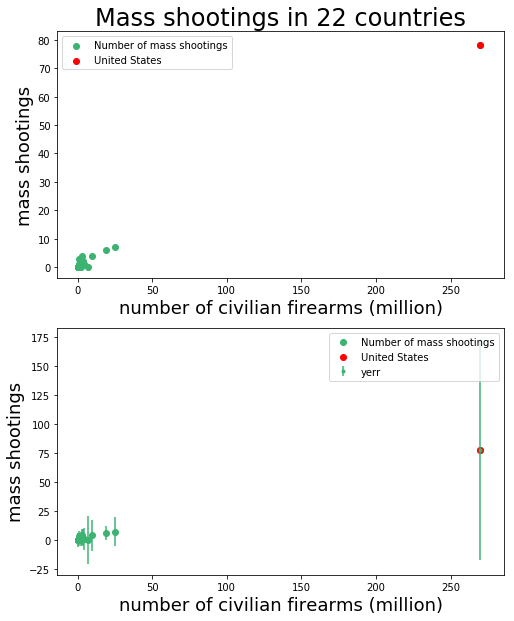

Figure 6. Number of mass shootings vs number of civilian firearms (million). The datapoint on the top right (marked red) of the plot is the USA, which has the highest number of civilian firearms, and has highest number of mass shootings.


In [15]:
fig = plt.figure(figsize=(8,10)) 

ax1 = fig.add_subplot(211)
scatter = ax1.scatter(df['Average total all civilian firearms']/1e6, 
                      df['Number of mass shootings'], color='mediumseagreen')
ax1.set_xlabel('number of civilian firearms (million)', fontsize = 18)
ax1.set_ylabel('mass shootings', fontsize = 18)
plt.scatter(df['Average total all civilian firearms'][df['Country Name']=='United States']/1e6, 
            df['Number of mass shootings'][df['Country Name']=='United States'], 
            label='United States', c='r')
ax1.set_ylim()
ax1.legend()
plt.title("Mass shootings in 22 countries", fontsize=24)

ax2 = fig.add_subplot(212)
scatter = ax2.scatter(df['Average total all civilian firearms']/1e6, 
                      df['Number of mass shootings'], color='mediumseagreen')
ax2.errorbar(df['Average total all civilian firearms']/1e6, df['Number of mass shootings'], 
             yerr = np.sqrt(df['Number of homicides by firearm']*1.0), fmt = '.', 
             color='mediumseagreen', label='yerr')
plt.scatter(df['Average total all civilian firearms'][df['Country Name']=='United States']/1e6, 
            df['Number of mass shootings'][df['Country Name']=='United States'], 
            label='United States', c='r')
ax2.set_xlabel('number of civilian firearms (million)', fontsize = 18)
ax2.set_ylabel('mass shootings', fontsize = 18)
ax2.set_ylim()
ax2.legend()
plt.show()
print ("\033[1mFigure 6. Number of mass shootings vs number of civilian firearms (million).\033[0m " + 
       "The datapoint on the top right (marked red) of the plot is the USA, " + 
       "which has the highest number of civilian firearms, " +
       "and has highest number of mass shootings.")

# 3. Modeling

#### fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - numpy.polyfit()

# Define alpha = 0.05

In [16]:
df['ms_pp'] = df['Number of mass shootings'] / df['pop']  #number of mass shootings per person
print(df['ms_pp'].mean())  #check order of magnitude
print(df['CivilianFireArms_pp'].mean())

1.21021254397e-07
228.950085729


In [17]:
#divide by the order of magnitude
df['ms_pp_oom'] = df['ms_pp'] * 1e7    #mass shootings per person
df['cfa_pp_oom'] = df['CivilianFireArms_pp'] / 1e2   #average total all civilian firearms per person

In [18]:
#ols
lm_ols = smf.ols('ms_pp_oom ~ cfa_pp_oom', data=df).fit()
lm_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ms_pp_oom   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     4.971
Date:                Tue, 17 Oct 2017   Prob (F-statistic):             0.0374
Time:                        23:22:26   Log-Likelihood:                -39.232
No. Observations:                  22   AIC:                             82.46
Df Residuals:                      20   BIC:                             84.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3149      0.515      0.612      0.548      -0.759       1.388
cfa_pp_oom     0.3911      0.175      2.230      0.037       0.025       0.757
==============================================================================
Omnibus:                       34.840   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.018
Skew:                           2.733   Prob(JB):                     7.71e-20
Kurtosis:                      11.133   Cond. No.                         5.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The OLS regression shows the p-value of cfa_pp_oom < 0.05, meaning the number of mass shootings per person and average total all civilian firearms per person are strongly correlated. But the R-squared = 0.199, meaning the whole model might not explain the dependent variable well.

In [19]:
yerror = np.sqrt(df['Number of mass shootings']) / df['pop'] * 1e7
We = 1.0 / yerror**2
We = We.replace(np.inf, yerror.mean())   #use mean yerror to replace when weight become infinite

In [20]:
#wls
lm_wls = smf.wls('ms_pp_oom ~ cfa_pp_oom', data=df, weights=We).fit()
lm_wls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:              ms_pp_oom   R-squared:                       0.823
Model:                            WLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     93.16
Date:                Tue, 17 Oct 2017   Prob (F-statistic):           5.72e-09
Time:                        23:22:26   Log-Likelihood:                -21.772
No. Observations:                  22   AIC:                             47.54
Df Residuals:                      20   BIC:                             49.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0322      0.128      0.253      0.803      -0.234       0.298
cfa_pp_oom     0.2906      0.030      9.652      0.000       0.228       0.353
==============================================================================
Omnibus:                        2.473   Durbin-Watson:                   1.596
Prob(Omnibus):                  0.290   Jarque-Bera (JB):                1.998
Skew:                           0.710   Prob(JB):                        0.368
Kurtosis:                       2.593   Cond. No.                         6.52
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The WLS shows better result than OLS in terms of the R-square. The p-value of cfa_pp_oom < 0.05, meaning the number of mass shootings per person and average total all civilian firearms per person are strongly correlated. The R-squared = 0.823, p(F-statistic) < 0.05, meaning the whole model explains the dependent variable well.

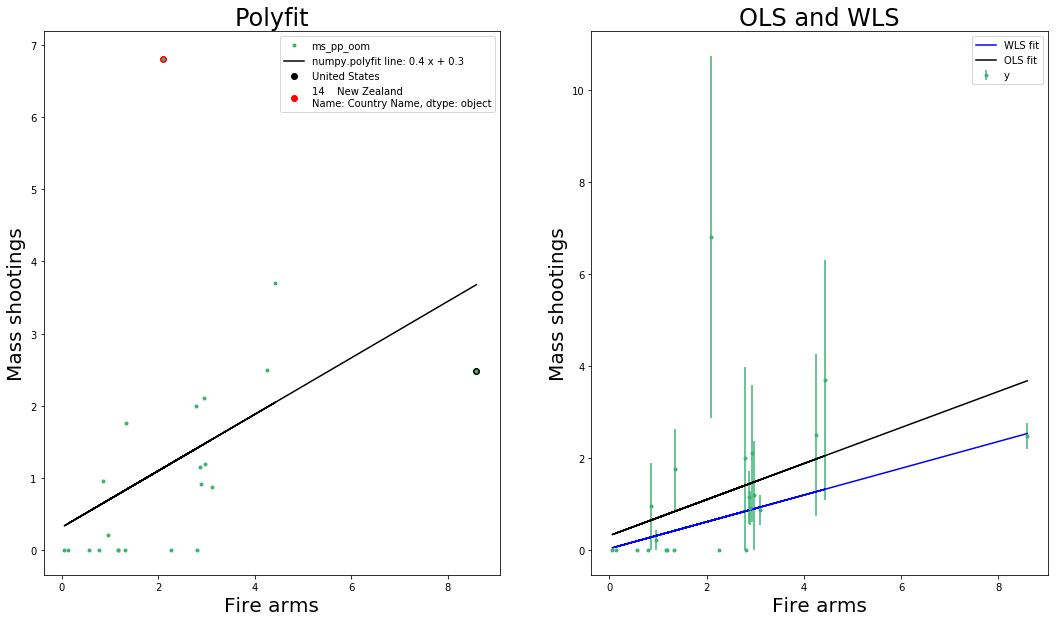

Figure 7. Fit a line to the Number of mass shootings per person as a function of Average total all civilian firearms per person. On the left is the Polyfit.Two outliers can be identified. One is the New Zealand marked in red, with extraordinary numbers of mass shootings. The other is the US marked in bule, with extraordinary numbers of fire arms.


In [21]:
fig = plt.figure(figsize = (18,10))

beta1_np, beta0_np = np.polyfit(df.cfa_pp_oom, df.ms_pp_oom, 1) 

fig.add_subplot(121)
plt.plot(df['cfa_pp_oom'], df['ms_pp_oom'], '.', color='mediumseagreen')
plt.scatter(df['cfa_pp_oom'][df['Country Name']=='United States'],
            df['ms_pp_oom'][df['Country Name']=='United States'], label='United States', c='k')
plt.scatter(df['cfa_pp_oom'][df['ms_pp_oom']==df['ms_pp_oom'].max()],
            df['ms_pp_oom'][df['ms_pp_oom']==df['ms_pp_oom'].max()], 
            label=df['Country Name'][df['ms_pp_oom']==df['ms_pp_oom'].max()], c='r')
plt.xlabel('Fire arms', fontsize=20)
plt.ylabel('Mass shootings', fontsize=20)
plt.plot(df.cfa_pp_oom, df.cfa_pp_oom * beta1_np + beta0_np, 'k-',
        label="numpy.polyfit line: %.1f x + %.1f"%(beta1_np, beta0_np))
plt.title('Polyfit', fontsize = 24)
plt.legend()

fig.add_subplot(122)
plt.title('OLS and WLS', fontsize = 24)
plt.xlabel('Fire arms', fontsize = 20)
plt.ylabel('Mass shootings', fontsize = 20)
plt.plot(df['cfa_pp_oom'], lm_wls.predict(), color='b', label='WLS fit')
plt.plot(df['cfa_pp_oom'], lm_ols.predict(), color='k', label='OLS fit')
plt.errorbar(df['cfa_pp_oom'], df['ms_pp_oom'], 
             yerr = np.sqrt(df['Number of mass shootings']) / df['pop'] * 1e7, 
             fmt = '.', color='mediumseagreen', label='y')
plt.legend()
plt.show()
print ('\033[1mFigure 7. Fit a line to the Number of mass shootings per person ' +
       'as a function of Average total all civilian firearms per person.\033[0m ' +
       'On the left is the Polyfit.Two outliers can be identified. One is the New Zealand ' +
       'marked in red, with extraordinary numbers of mass shootings. The other is the US ' +
       'marked in bule, with extraordinary numbers of fire arms.')

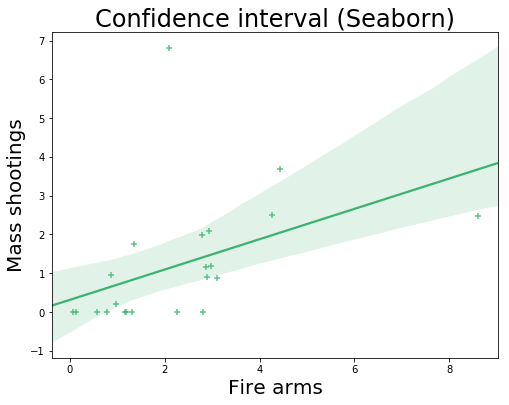

Figure 8. Use Seaborn to plot the regression confidence intervals.


In [26]:
plt.figure(figsize=(8, 6))
sns.regplot(x='cfa_pp_oom', y='ms_pp_oom', data=df, marker='+', color='mediumseagreen')
plt.ylabel('Mass shootings', fontsize=20)
plt.xlabel('Fire arms', fontsize=20)
plt.title('Confidence interval (Seaborn)', fontsize=24)
plt.show()
print ("\033[1mFigure 8. Use Seaborn to plot the regression confidence intervals.\033[0m")

## Extra credit: calculate the confidence interval by hand and also plot them 

**A confidence interval for E(y | x) , the expected (average) value of y for a given x_**

define s: residual standard error sy = sqrt(Sum((y_observed-y_predicted)^2)/(n-2))

(note: n-2 is the degrees of freedom of the problem: observations - number of parameters - 1)

the confidence interval for a given y(x*) is: 

y_predicted(x*) +/- t_(alpha/2)(n-2) * sy * sqrt( 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

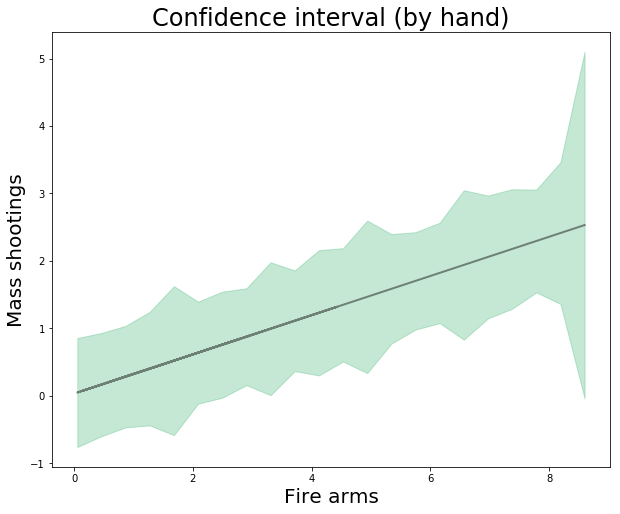

Figure 9. Plot the regression confidence intervals by hand.


In [23]:
x = df['cfa_pp_oom']
y_model = lm_wls.predict()

n = len(df)
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x,y_model,'-', color='0.1', linewidth='2', alpha=0.5, label='Fit')  

x2 = np.linspace(np.min(x), np.max(x), 22)
y2 = np.linspace(np.min(y_model), np.max(y_model), 22)

t = stats.t.ppf(0.975, n-2)
sy = np.sqrt(sum((df['ms_pp_oom'] - y_model) ** 2) / (n-2))
CI = t*sy*np.sqrt(1/n +(x-np.mean(x))**2/np.sum((x-np.mean(x))**2))
ax.fill_between(x2, y2+CI, y2-CI, color='mediumseagreen', edgecolor='', alpha=0.3)

plt.ylabel('Mass shootings', fontsize=20)
plt.xlabel('Fire arms', fontsize=20)
plt.title('Confidence interval (by hand)', fontsize=24)
plt.show()
print ("\033[1mFigure 9. Plot the regression confidence intervals by hand.\033[0m")

## Use the stsatsmodels.gaphics package to plot the influence plot. 

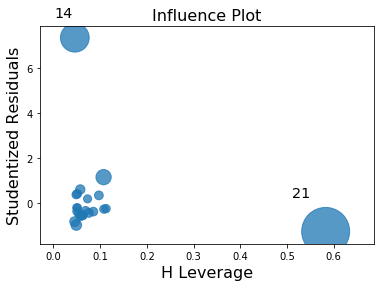

Figure 9. The influence plot. Cook's distance is used to estimate the influence of data points. Here the influence of points 21 and 14 are most noteworthy.


In [24]:
sm.graphics.influence_plot(lm_ols, alpha  = 0.05, criterion="cooks")
plt.show()
print ("\033[1mFigure 9. The influence plot.\033[0m Cook's distance is used to estimate " +
       "the influence of data points. Here the influence of points 21 and 14 " +
       "are most noteworthy.")

In [25]:
df.iloc[[14, 21]]

,Country Name,Average total all civilian firearms,pop,gdp,Number of homicides by firearm,Country,Guns/100 inhabitants,Number of mass shootings,gdp_pp,CivilianFireArms_pp,NumberOfHomicide_pp,ms_pp,ms_pp_oom,cfa_pp_oom
14,New Zealand,925000.0,4408100.0,1.761930e+11,7.0,New Zealand,22.6,3,39970.281981,209.840975,1.587986,6.805653e-07,6.805653,2.098410
21,United States,270000000.0,313998379.0,1.615530e+13,9146.0,United States,88.8,78,51450.265608,859.877051,29.127539,2.484089e-07,2.484089,8.598771


## Discuss your findings

### In this homework, I found that US shows extraordinary numbers of fire arms, homicides by fire arm, and mass shooting. The number of mass shootings per person and average total all civilian firearms per person are strongly correlated. Meanwhile, New Zealand shows extraordinary ratio of mass shootings, in terms of its population.